In [14]:
1/3

0.3333333333333333

In [24]:
a = 0.99999999999999999

In [27]:
a?

In [31]:
62 * 41.2 * 2 / 250

20.435200000000002

In [44]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(10, dtype=np.float) - 3).reshape(-1,1)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns = ["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])

In [45]:
x

array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])

In [46]:
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-1.566699,-1.000000,0.000000,-0.500000
1,-2.0,-1.218544,-0.777778,0.111111,-0.333333
2,-1.0,-0.870388,-0.555556,0.222222,-0.166667
3,0.0,-0.522233,-0.333333,0.333333,0.000000
4,1.0,-0.174078,-0.111111,0.444444,0.166667
5,2.0,0.174078,0.111111,0.555556,0.333333
6,3.0,0.522233,0.333333,0.666667,0.500000
7,4.0,0.870388,0.555556,0.777778,0.666667
8,5.0,1.218544,0.777778,0.888889,0.833333
9,6.0,1.566699,1.000000,1.000000,1.000000


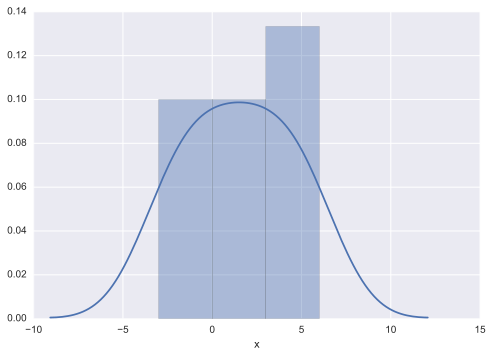

In [50]:
sns.distplot(df["x"])

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [ 5.84333333  3.054       3.75866667  1.19866667]
old std:  [ 0.82530129  0.43214658  1.75852918  0.76061262]
new mean: [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15]
new std:  [ 1.  1.  1.  1.]


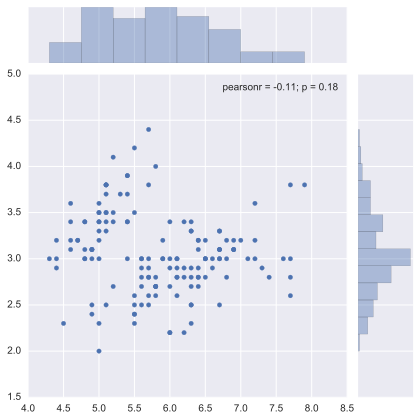

In [52]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

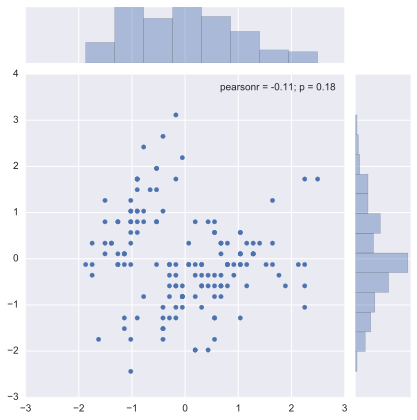

In [53]:
sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

In [55]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [ 2.  1.  0.  1.  2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [ 1.  1.  1.  1.  1.]


In [66]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:3]
data3 = normalize(data1)

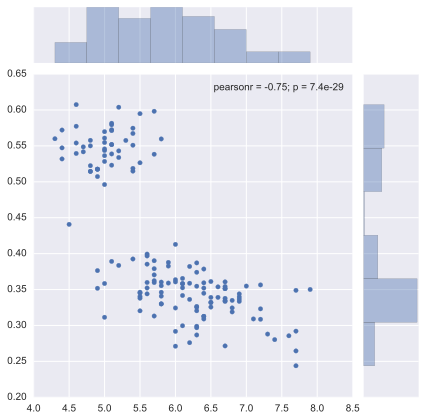

In [67]:
sns.jointplot(data1[:,0], data3[:,1])
plt.show()

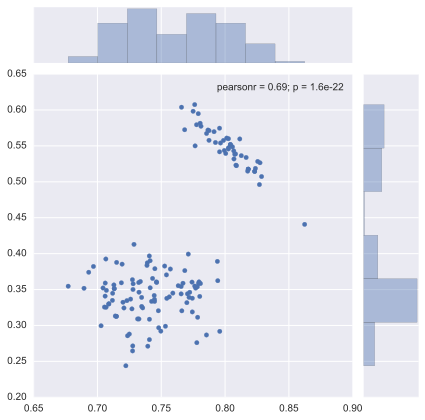

In [68]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [70]:
X = np.array([[0],[1],[2]])
X

array([[0],
       [1],
       [2]])

In [71]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [81]:
print(ohe.transform(X))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0


In [74]:
dir(ohe)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_transform',
 '_get_param_names',
 '_transform',
 'active_features_',
 'categorical_features',
 'dtype',
 'feature_indices_',
 'fit',
 'fit_transform',
 'get_params',
 'handle_unknown',
 'n_values',
 'n_values_',
 'set_params',
 'sparse',
 'transform']

In [82]:
X = np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2]])
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [87]:
ohe.fit(X)
ohe.transform(X)

<4x9 sparse matrix of type '<type 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [97]:
from sklearn.datasets import make_regression
bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = np.hstack([np.ones_like(X0), X0])
X[:5]

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682]])

In [98]:
X0

array([[-0.61175641],
       [-0.24937038],
       [ 0.48851815],
       [ 0.76201118],
       [ 1.51981682],
       [ 0.37756379],
       [ 0.51292982],
       [-0.67124613],
       [-1.39649634],
       [ 0.31563495],
       [-0.63699565],
       [-0.39675353],
       [-1.10061918],
       [ 0.90085595],
       [-1.09989127],
       [ 0.82797464],
       [-0.07557171],
       [-0.35224985],
       [-0.67066229],
       [-1.07296862],
       [-0.30620401],
       [ 2.18557541],
       [ 0.86540763],
       [ 0.19829972],
       [-0.38405435],
       [-0.68372786],
       [ 0.05080775],
       [ 0.58281521],
       [ 1.25286816],
       [-0.75439794],
       [-0.34934272],
       [-0.88762896],
       [ 0.18656139],
       [ 0.87616892],
       [ 0.83898341],
       [-0.50446586],
       [-0.34385368],
       [ 1.6924546 ],
       [-2.3015387 ],
       [ 0.93110208],
       [ 2.10025514],
       [ 1.46210794],
       [-0.84520564],
       [-0.87785842],
       [-0.3224172 ],
       [ 0

In [92]:
y = y.reshape(len(y), 1)
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("bias:", bias)
print("coef:", coef)
print("w:\n", w)

bias: 100
coef: 80.7105195619
w:
 [[ 102.02701439]
 [  81.59750943]]


In [93]:
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

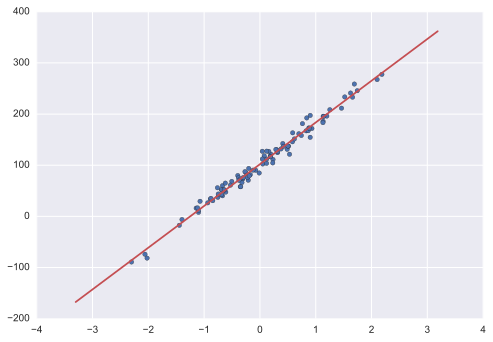

In [94]:
xx = np.linspace(np.min(X0) - 1, np.max(X0) + 1, 1000)
XX = np.vstack([np.ones(xx.shape[0]), xx.T]).T
yy = np.dot(XX, w)
plt.scatter(X0, y)
plt.plot(xx, yy, 'r-')
plt.show()

In [95]:
np.linspace?

In [99]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [104]:
dfX_diabetes = pd.DataFrame(diabetes.data, columns=["X%d" % (i+1) for i in range(np.shape(diabetes.data)[1])])
dfy_diabetes = pd.DataFrame(diabetes.target, columns=["target"])
df_diabetes0 = pd.concat([dfX_diabetes, dfy_diabetes], axis=1)
df_diabetes0.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [105]:
from sklearn.linear_model import LinearRegression

model_diabetes = LinearRegression().fit(diabetes.data, diabetes.target)

In [108]:
model_diabetes.intercept_

152.13348416289651

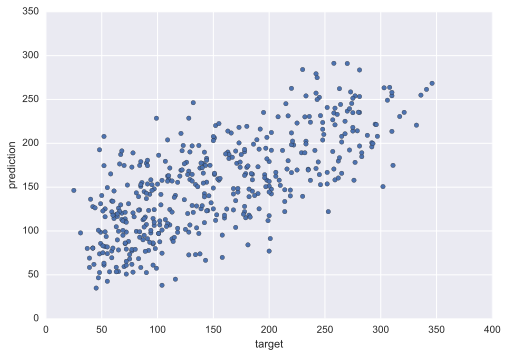

In [110]:
predictions = model_diabetes.predict(diabetes.data)
plt.scatter(diabetes.target, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()

In [111]:
sk.metrics.mean_squared_error(diabetes.target, predictions)


2859.6903987680657

In [113]:
df_diabetes = sm.add_constant(df_diabetes0)
df_diabetes.tail()


,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,1,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,1,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,1,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,1,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,1,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [114]:
model_diabetes2 = sm.OLS(df_diabetes.ix[:, -1], df_diabetes.ix[:, :-1])
result_diabetes2 = model_diabetes2.fit()
result_diabetes2

In [132]:
print(result_diabetes2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 01 Jun 2016   Prob (F-statistic):           3.83e-62
Time:                        07:41:27   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [124]:
result_diabetes2.summary2

<bound method OLSResults.summary2 of <statsmodels.regression.linear_model.OLSResults object at 0x7fd4d5439450>>

In [125]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston0 = pd.concat([dfX_boston, dfy_boston], axis=1)
df_boston0.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [126]:
model_boston = LinearRegression().fit(boston.data, boston.target)
print(model_boston.coef_)
print(model_boston.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


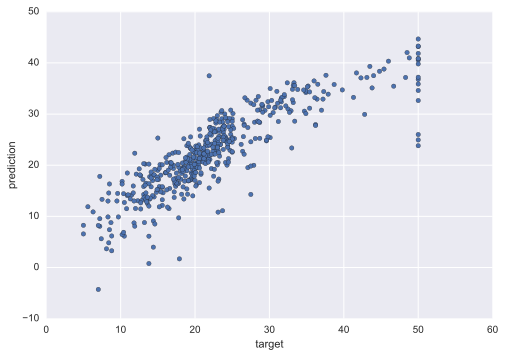

In [127]:
predictions = model_boston.predict(boston.data)
plt.scatter(boston.target, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()

In [128]:
mean_abs_error = (np.abs(((boston.target - predictions)/boston.target)*100)).mean()
print("MAE: %.2f%%" % (mean_abs_error))

MAE: 16.43%


In [129]:
sk.metrics.median_absolute_error(boston.target, predictions)

2.4559464328035467

In [130]:
sk.metrics.mean_squared_error(boston.target, predictions)

21.8977792176875

In [131]:
df_boston = sm.add_constant(df_boston0)
model_boston2 = sm.OLS(df_boston.ix[:, -1], df_boston.ix[:, :-1])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 01 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        07:39:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0